#### State space:
$$
\vec{x} =
\begin{bmatrix}
x_0 \\
x_1 \\
x_2
\end{bmatrix}
$$

where $x_1$ is a proxy for deformation $s$, and $x_2$, for velocity $v$.

#### ODE:
$$
\dot{\vec{x}} =
\begin{bmatrix}
0 \\
x_2 \\
g - \frac{\beta}{m} x_2 - \frac{k}{m} x_1
\end{bmatrix}
$$

#### Initial conditions:

$$
\vec{x}(t=0) =
\begin{bmatrix}
1 \\
-1 \\
-2
\end{bmatrix}
\quad\quad
\Delta t = 0.1
$$

#### Update rule (Backward Euler):

$$
\vec{x} (t + \Delta t) = \vec{x}(t) + \Delta t \cdot \dot{\vec{x}}_{FE} (t + \Delta t)
$$

##### Rewriting...

$$
\vec{x} (t + \Delta t) = \vec{x}(t) + \Delta t \cdot M \cdot \bigg( \vec{x} (t) +  \Delta t \cdot M \cdot \vec{x} (t) \bigg)
$$

where:

$$
M =
\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 1 \\
g & -\frac{k}{m} & -\frac{\beta}{m}
\end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
g = 0.0
k = 2.0
m = 0.5
beta = 0.0

In [3]:
M = np.array([[0, 0, 0],
              [0, 0, 1],
              [g, -k/m, -beta/m]])

In [4]:
X0 = np.array([1, -1, -2]).T

In [5]:
delta_t = 0.1
N = 2000
xs, vs = [X0[1]], [X0[2]]

In [6]:
def derivative(X):
    global M
    return M.dot(X)

In [7]:
def forward_euler(X):
    global delta_t
    return X + delta_t * derivative(X)

In [8]:
def backward_euler(X):
    global delta_t
    X_FE = forward_euler(X)
    return X + delta_t * derivative(X_FE)

In [9]:
for _ in range(N):
    X0 = backward_euler(X0)
    xs.append(X0[1])
    vs.append(X0[2])

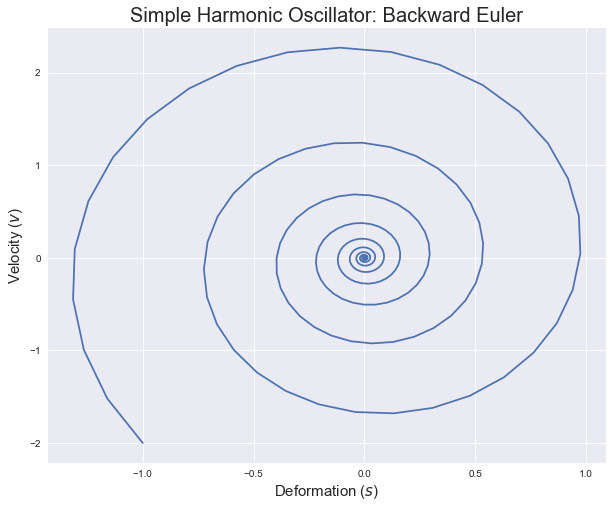

In [10]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title('Simple Harmonic Oscillator: Backward Euler', fontsize=20)
ax.set_xlabel('Deformation ($s$)', fontsize=15)
ax.set_ylabel('Velocity ($v$)', fontsize=15)

ax.plot(xs,vs)
plt.show()